In [75]:
import pandas as pd
import yfinance as yf
import numpy as np
from scipy.stats import pearsonr
import plotly.graph_objects as go
from sklearn.model_selection import TimeSeriesSplit
from prophet import Prophet

In [76]:
btc_data = yf.download(tickers='BTC-USD', start='2021-01-01', end='2022-10-20', interval = '1d')
btc_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782


In [77]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 657 entries, 2021-01-01 to 2022-10-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       657 non-null    float64
 1   High       657 non-null    float64
 2   Low        657 non-null    float64
 3   Close      657 non-null    float64
 4   Adj Close  657 non-null    float64
 5   Volume     657 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 35.9 KB


In [78]:
btc_data.rename(columns={'Close':'Price'},inplace=True)
btc_data.drop(columns=['Adj Close','Volume'],inplace=True)
btc_data.reset_index(inplace=True)
btc_data

,Date,Open,High,Low,Price
0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344
1,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578
2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438
3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062
4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688
...,...,...,...,...,...
652,2022-10-15,19185.437500,19212.541016,19019.250000,19067.634766
653,2022-10-16,19068.914062,19389.603516,19068.914062,19268.093750
654,2022-10-17,19268.562500,19635.802734,19173.333984,19550.757812
655,2022-10-18,19550.466797,19666.994141,19144.769531,19334.416016


In [79]:
fig = go.Figure()# Candlestick chart
fig.add_trace(go.Candlestick(x=btc_data.index,
                open=btc_data['Open'],
                high=btc_data['High'],
                low=btc_data['Low'],
                close=btc_data['Price'],
                name = 'Bitcoin Data'))

In [80]:
btc_data.drop(['Open','High','Low'],inplace=True,axis=1)

In [81]:
btc_data

,Date,Price
0,2021-01-01,29374.152344
1,2021-01-02,32127.267578
2,2021-01-03,32782.023438
3,2021-01-04,31971.914062
4,2021-01-05,33992.429688
...,...,...
652,2022-10-15,19067.634766
653,2022-10-16,19268.093750
654,2022-10-17,19550.757812
655,2022-10-18,19334.416016


In [82]:
btc_data.rename(columns={'Date':'ds','Price':'y'},inplace=True)
df_train = btc_data[btc_data['ds']<='2022-07-30']
df_test = btc_data[btc_data['ds']>'2022-07-30']

time_clf = Prophet(interval_width=0.85, n_changepoints=7)
time_clf.fit(df_train)



19:55:35 - cmdstanpy - INFO - Chain [1] start processing
19:55:35 - cmdstanpy - INFO - Chain [1] done processing


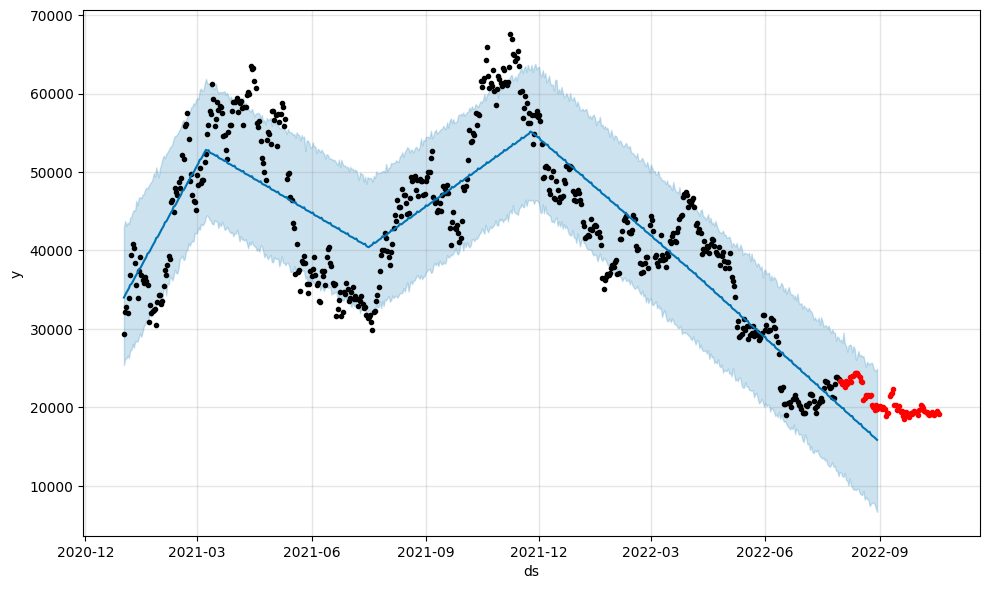

In [83]:
# Create a future dataframe for prediction
future = time_clf.make_future_dataframe(periods=31)# Forecast the future dataframe values
forecast = time_clf.predict(future)# Check the forecasted values and upper/lower bound
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()# Visualize the forecast
fig = time_clf.plot(forecast)
ax = fig.gca()
ax.plot( df_test["ds"], df_test["y"], 'r.')

In [ ]:
eth_data = yf.download(tickers='ETH-USD', start='2021-01-01', end='2022-10-20', interval = '1d')
eth_data.head()

In [ ]:
eth_data.rename(columns={'Close':'Price'},inplace=True)
eth_data.drop(columns=['Adj Close','Volume'],inplace=True)
eth_data.head()

In [ ]:
pearsonr(eth_data['Price'],btc_data['Price'])

It can be seen that the previous pvalue is less than 0.05 meaning that we reject the null hypothesis implying a detectable correlation between Ethereum and Bitcoin prices in the last 1.5 year. This is an example of correlation and there is no verifiable presence of causation.